In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 

In [77]:
x=pd.read_csv("../data/csv_tmp.csv", index_col=False,header=None,names=['V','E','F','T','Boundary','Time','Diamond'])

In [78]:
len(x)

5345

In [79]:
np.mean(x['Diamond']*2+(1-x['Diamond'])*4)

2.511813045837231

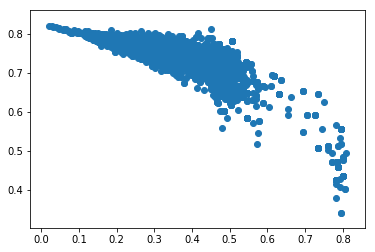

In [80]:
plt.scatter(x['Boundary'],x['Diamond'])

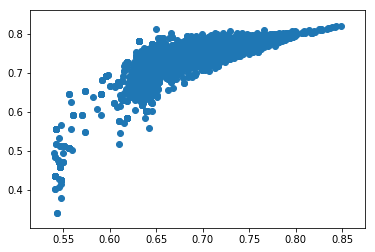

In [81]:
plt.scatter(x['T']/x['E'],x['Diamond'])

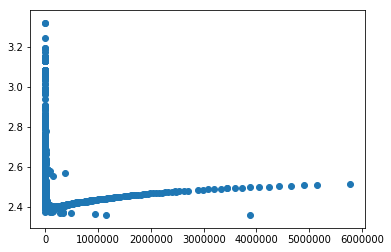

In [82]:
plt.scatter(x['T'],x['Diamond']*2+(1-x['Diamond'])*4)

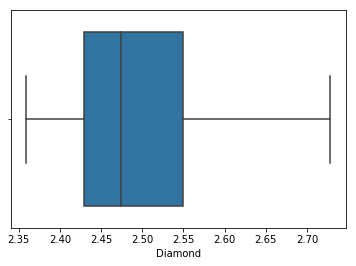

In [83]:
ax = sns.boxplot(x=x['Diamond']*2+(1-x['Diamond'])*4,showfliers=False)

<Figure size 1080x504 with 0 Axes>

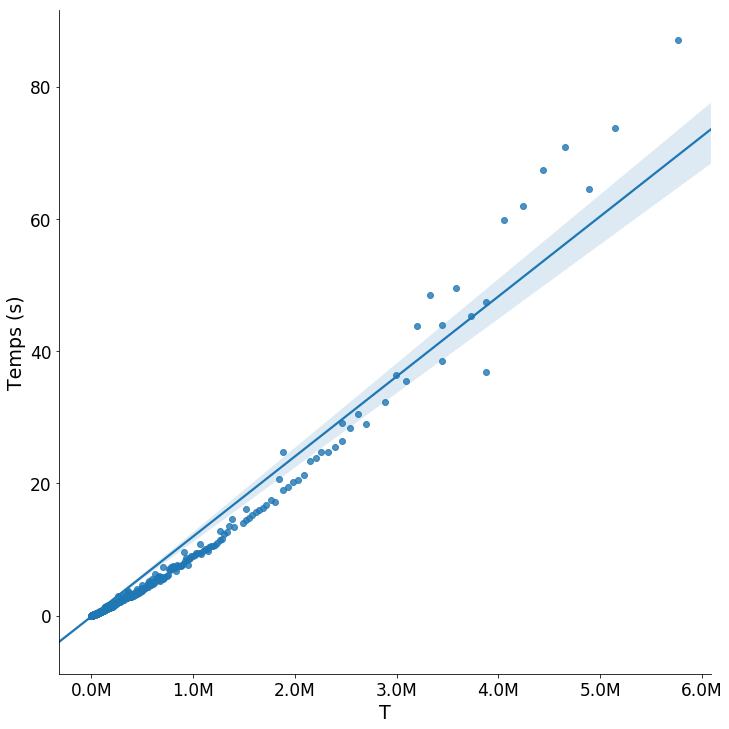

In [95]:
%matplotlib inline

plt.figure(figsize=(15, 7))
chart = sns.lmplot(x='T',y='Time',data=x,height=10)
# sns.lineplot(x['V'].values.reshape(-1), lin2.predict(X_poly).reshape(-1),color="r")
# plt.legend(loc='upper left', labels=['y=4.5x','Maillages'])
ticksx = chart.axes[0][0].get_xticks()
xlabels = [str(x/1e6) + 'M' for x in ticksx]
chart.set_xticklabels(xlabels)
plt.xlabel("T",fontsize=19)
plt.ylabel("Temps (s)",fontsize=19)
plt.tick_params(labelsize=17)

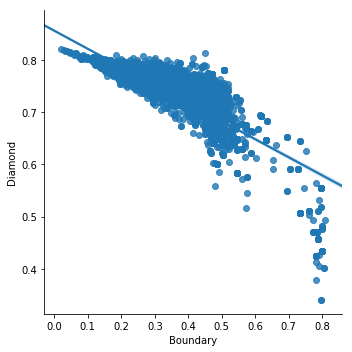

In [85]:
sns.lmplot(x='Boundary',y='Diamond',data=x)

(5345, 2)
[0.         0.69133703]


Text(63.125,0.5,'RPT')

<Figure size 1296x504 with 0 Axes>

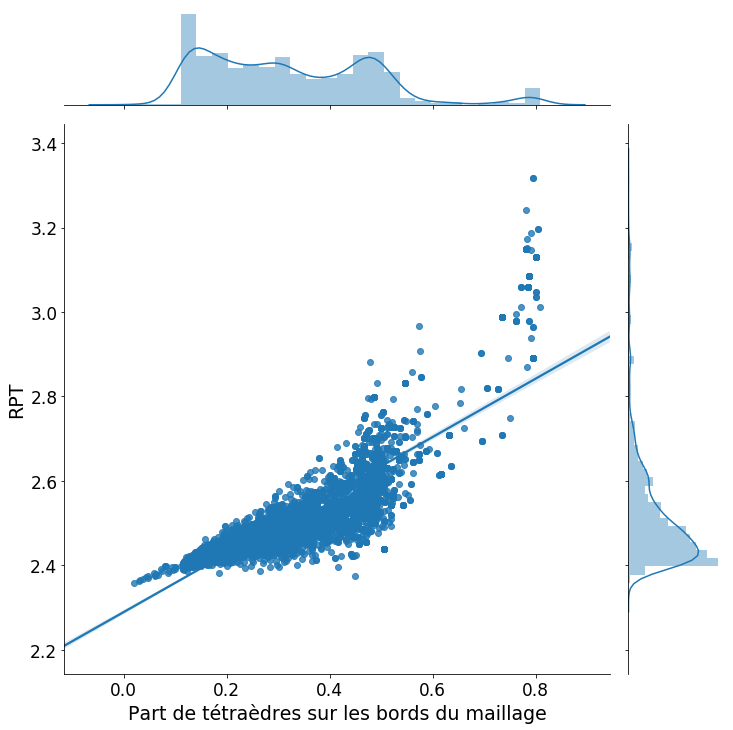

In [97]:
%matplotlib inline

plt.figure(figsize=(18, 7))
sns.jointplot(x=x['Boundary'],y=x['Diamond']*2+(1-x['Diamond'])*4,kind="reg",height=10)

poly = PolynomialFeatures(degree = 1) 
X_poly = poly.fit_transform(x['Boundary'].values.reshape(-1,1)) 
# poly.fit(X_poly, x['T']) 
print(X_poly.shape)
lin2 = LinearRegression() 
lin2.fit(X_poly, x['Diamond']*2+(1-x['Diamond'])*4) 
print(lin2.coef_)
plt.tick_params(labelsize=17)
plt.xlabel("Part de tétraèdres sur les bords du maillage",fontsize=19)
plt.ylabel("RPT",fontsize=19)
# sns.lineplot(x['Boundary'].values.reshape(-1), lin2.predict(X_poly), color = 'red') 

In [ ]:
lin2.predict(x['V'].values.reshape(-1,1))

(5345, 2)


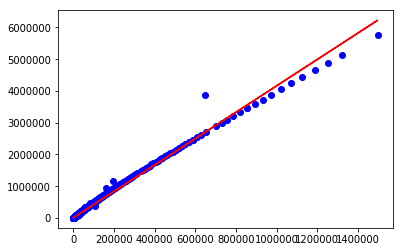

In [90]:

poly = PolynomialFeatures(degree = 1) 
X_poly = poly.fit_transform(x['V'].values.reshape(-1,1)) 
# poly.fit(X_poly, x['T']) 
print(X_poly.shape)
lin2 = LinearRegression() 
lin2.fit(X_poly, x['T']) 

plt.scatter(x['V'], x['T'], color = 'blue') 
  
plt.plot(x['V'].values.reshape(-1,1), lin2.predict(X_poly), color = 'red') 

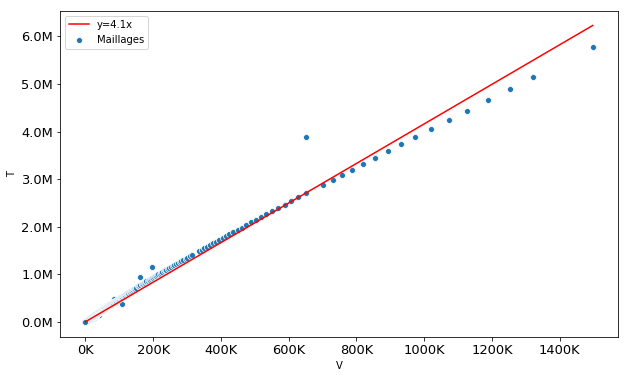

In [93]:
%matplotlib inline
plt.figure(figsize=(10, 6))
chart = sns.scatterplot(x['V'], x['T'])
sns.lineplot(x['V'].values.reshape(-1), lin2.predict(X_poly).reshape(-1),color="r")
plt.legend(loc='upper left', labels=['y=4.1x','Maillages'])
ticksx = chart.axes.get_xticks()
ticksy = chart.axes.get_yticks()
xlabels = [str(int(x/1000)) + 'K' for x in ticksx]
ylabels = [str(x/1e6) + 'M' for x in ticksy]
chart.set_xticklabels(xlabels)
chart.set_yticklabels(ylabels)
plt.tick_params(labelsize=13)

In [ ]:
lin2.coef_

In [ ]:
w

In [ ]:
a=[]
for i in x['V'].values:
    tmp=0
    for degree,s in enumerate(w):
        tmp+=s*(i**degree)
    a.append(tmp)

In [ ]:
plt.scatter(x['V'],a)
plt.scatter(x['V'],x['T'])

In [ ]:
sns.lmplot(x='V',y='T',data=x)

In [ ]:
bfs

In [98]:
ith_diamond=pd.read_csv("../data/time_to_access_ith_diamond.csv",header=None).values.reshape(-1,1)*1e-6
ith_tetra=pd.read_csv("../data/time_to_access_ith_tetra.csv",header=None).values.reshape(-1,1)*1e-6
vertex_degree=pd.read_csv("../data/time_to_compute_vertex_degree.csv",header=None).values.reshape(-1,1)*1e-6
bfs=pd.read_csv("../data/time_to_compute_BFS.csv",header=None).values.reshape(-1,1)*1e-3

In [99]:
ith_diamond2=pd.read_csv("../data/time_to_access_ith_diamond2.csv",header=None).values.reshape(-1,1)*1e-6
ith_tetra2=pd.read_csv("../data/time_to_access_ith_tetra2.csv",header=None).values.reshape(-1,1)*1e-6
vertex_degree2=pd.read_csv("../data/time_to_compute_vertex_degree2.csv",header=None).values.reshape(-1,1)*1e-6
bfs2=pd.read_csv("../data/time_to_compute_BFS2.csv",header=None).values.reshape(-1,1)*1e-3

In [ ]:
ith_diamond[:-1]

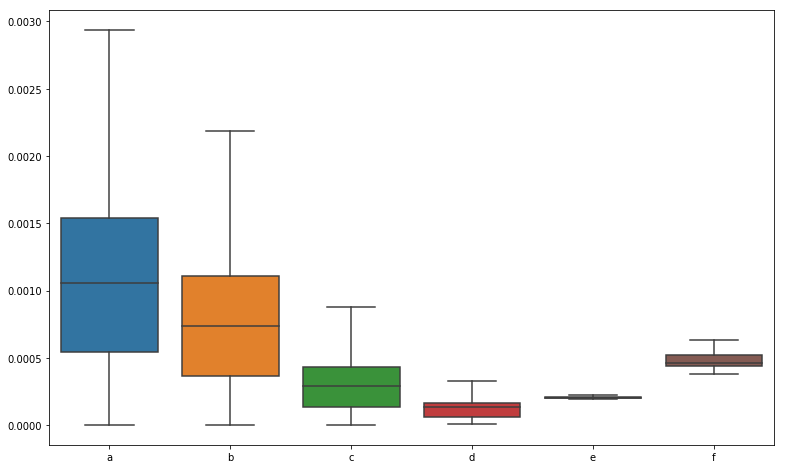

In [100]:
# a=pd.concat([pd.DataFrame(ith_tetra),pd.DataFrame(vertex_degree),pd.DataFrame(bfs)],axis=1)
%matplotlib inline
plt.figure(figsize=(13, 8))

a=pd.concat([pd.DataFrame(ith_tetra),pd.DataFrame(ith_tetra2),pd.DataFrame(vertex_degree),
             pd.DataFrame(vertex_degree2),pd.DataFrame(bfs),pd.DataFrame(bfs2)],axis=1)
a.columns = ['a','b','c','d','e','f']
sns.boxplot(data=a,showfliers=False)